Model Accuracy for Tumor_Type: 0.49

Classification Report for Tumor_Type:
               precision    recall  f1-score   support

      Benign       0.49      0.50      0.49      1997
   Malignant       0.49      0.47      0.48      2003

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



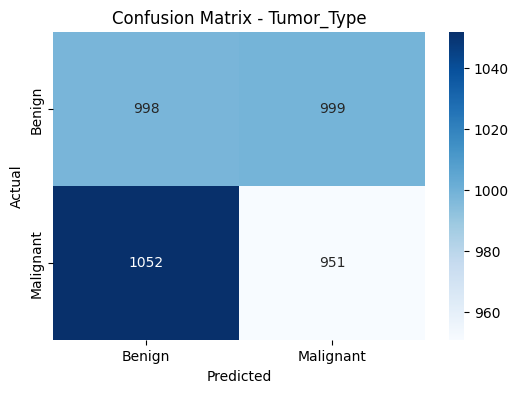

Model Accuracy for Stage: 0.25

Classification Report for Stage:
               precision    recall  f1-score   support

           I       0.24      0.26      0.25       973
          II       0.28      0.31      0.29      1026
         III       0.25      0.23      0.24      1005
          IV       0.24      0.21      0.22       996

    accuracy                           0.25      4000
   macro avg       0.25      0.25      0.25      4000
weighted avg       0.25      0.25      0.25      4000



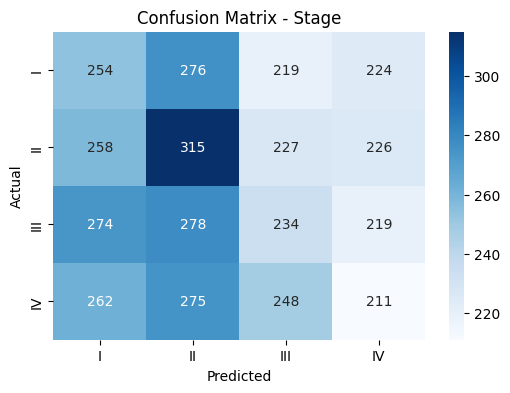

Model Accuracy for Survival_High_Low: 1.00

Classification Report for Survival_High_Low:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00      2033
        High       1.00      1.00      1.00      1967

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



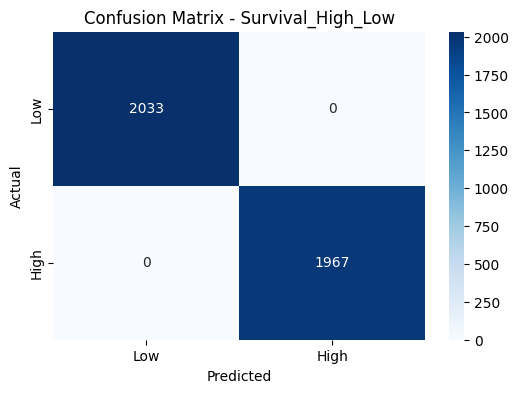

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("brain_tumor_dataset.csv")

# Drop non-relevant columns
df = df.drop(columns=["Patient_ID"])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "Tumor_Type", "Location", "Histology", "Stage",
                    "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment",
                    "Surgery_Performed", "Chemotherapy", "Family_History", "MRI_Result",
                    "Follow_Up_Required"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()

# Define function for training and evaluating models
def train_and_evaluate_model(target_column, target_labels):
    # Prepare features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Standardize numerical features
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=target_labels)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"Model Accuracy for {target_column}: {accuracy:.2f}\n")
    print(f"Classification Report for {target_column}:\n", classification_rep)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {target_column}")
    plt.show()

# Run classification models for each target variable

# 1. Tumor Type (Benign vs. Malignant)
train_and_evaluate_model("Tumor_Type", ["Benign", "Malignant"])

# 2. Tumor Stage (I, II, III, IV)
train_and_evaluate_model("Stage", ["I", "II", "III", "IV"])

# 3. Survival Prediction (High vs. Low Survival Rate) - Categorize survival rate
df["Survival_High_Low"] = df["Survival_Rate"].apply(lambda x: "High" if x > df["Survival_Rate"].median() else "Low")
train_and_evaluate_model("Survival_High_Low", ["Low", "High"])

Model Evaluation for Survival_Rate:
Mean Absolute Error (MAE): 14.90
Mean Squared Error (MSE): 302.62
Root Mean Squared Error (RMSE): 17.40
R-squared (R2 Score): -0.03



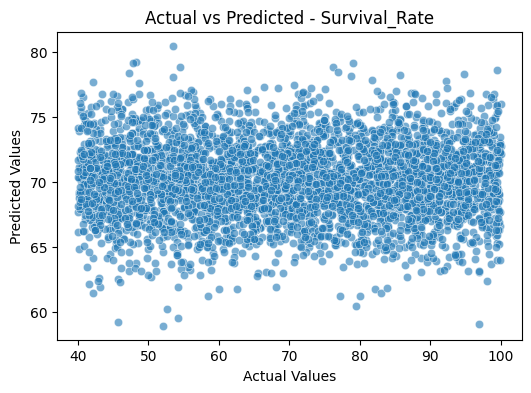

Model Evaluation for Tumor_Growth_Rate:
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 0.71
Root Mean Squared Error (RMSE): 0.84
R-squared (R2 Score): -0.02



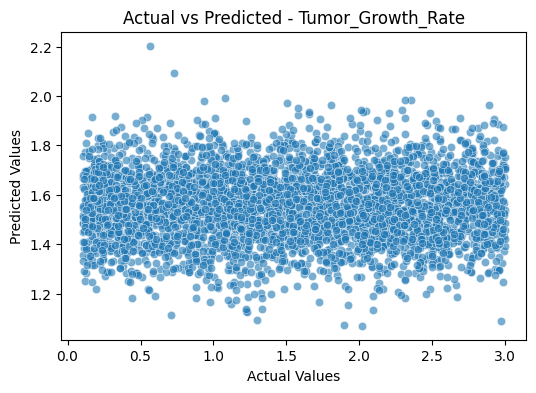

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("brain_tumor_dataset.csv")

# Drop non-relevant columns
df = df.drop(columns=["Patient_ID"])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "Tumor_Type", "Location", "Histology", "Stage",
                    "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment",
                    "Surgery_Performed", "Chemotherapy", "Family_History", "MRI_Result",
                    "Follow_Up_Required"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()

# Define function for training and evaluating regression models
def train_and_evaluate_regression(target_column):
    # Prepare features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Standardize numerical features
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Display results
    print(f"Model Evaluation for {target_column}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2 Score): {r2:.2f}\n")

    # Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {target_column}")
    plt.show()

# Run regression models for each target variable

# 1. Survival Rate Prediction
train_and_evaluate_regression("Survival_Rate")

# 2. Tumor Growth Rate Prediction
train_and_evaluate_regression("Tumor_Growth_Rate")
